<a href="https://colab.research.google.com/github/ojobo-tech/gisfordatascience/blob/main/ps1_ai_adoption_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GIS Project on AI Adoption in Governance Across the World**

**Presented by OJOBO AGBO EJE and SHAILESH REDDY DONTHI**

Artificial intelligence leverages computers and machines to mimic the problem-solving and decision-making capabilities of the human mind. With the speedy advancement of Artificial Intelligence, and its proven ability to improve productivity and provide accelerated solutions across different sectors of the economy, it is expected that many countries would have adopted AI in the delivery of public service to their citizens.

Research shows that many countries are still behind in the adoption of AI. This could be as a result of many varying factors.

It is also known that the acceptance or adoption of new technology could be affected or influenced by policy made by government for or against the technology.

The goal of this project is to ascertain how ready a given government is to implement AI in the delivery of public service to their citizens.

Answering this question means measuring the multiple dimension of governmental and technological progress that contribute to AI readiness.

NB: This is an annual project carried out by the United Nations and Oxford Insights. A link to the full report: https://www.oxfordinsights.com/s/Government_AI_Readiness_2022_FV.pdf

Oxford Insights is a U.K based organizations that help governments around the world to increase their impact

In [ ]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [ ]:
!pip install mapclassify
import mapclassify #need for thematic map classification

**Data Collection**

The main World Administrative Boundaries shapefile was collected from OpenDataSoft.com

The AI Readiness Index data was collected from OxfordInsights.com

The AI Indicators data was also collected from the UNIDO site


Some variables and their invdividual sources:
Telecommunications Infrastructure: [UN e-Government Survey](https://https://publicadministration.un.org/en/Research/UN-e-Government-Surveys)

Graduates in STEM: [UNESCO](https://http://data.uis.unesco.org/)

Foundational I.T Infrastructure: [World Bank GovTech Maturity Index](https://https://www.worldbank.org/en/programs/govtech/2022-gtmi)

Open Data: [Global Data Barometer](https://https://globaldatabarometer.org/module/governance/)

Research and Development Spending: [UNESCO](https://http://data.uis.unesco.org/)

Percentage Poverty per Country: [Wikipedia](https://https://colab.research.google.com/github/ojobo-tech/gisfordatascience/blob/main/ps1_ai_adoption_map.ipynb#scrollTo=_DCaty-iA-rp&line=19&uniqifier=1)

In [ ]:
#Data showing the country boundaries was collected from Open Data Soft:

! wget -q -O world-administrative-boundaries.zip https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/world-administrative-boundaries/exports/shp?lang=en&timezone=America%2FNew_York
zip_ref = zipfile.ZipFile('world-administrative-boundaries.zip', 'r'); zip_ref.extractall(); zip_ref.close() #To Unzip
wd_map = gpd.read_file('world-administrative-boundaries.shp') #To load the shapefile with gpd as wd_map

<Axes: >

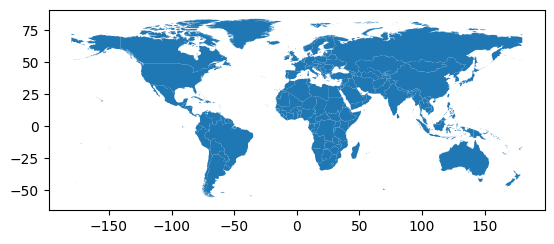

In [ ]:
#General Map of the World
wd_map.plot()

**Data Exploration**

We want to explore the type of data for each of the variables from the world map.

In [ ]:
wd_map.dtypes #with geopandas can do stuff like with pandas :)

iso3             object
status           object
color_code       object
name             object
continent        object
region           object
iso_3166_1_      object
french_shor      object
geometry       geometry
dtype: object

In [ ]:
wd_map.head(2)

,iso3,status,color_code,name,continent,region,iso_3166_1_,french_shor,geometry
0,UGA,Member State,UGA,Uganda,Africa,Eastern Africa,UG,Ouganda,"POLYGON ((33.92110 -1.00194, 33.92027 -1.00111..."
1,UZB,Member State,UZB,Uzbekistan,Asia,Central Asia,UZ,OuzbÃ©kistan,"POLYGON ((70.97081 42.25467, 70.98054 42.26205..."


In [ ]:
#keep it simple!
wd_map=wd_map[['name','geometry']]

In [ ]:
#Rename column, so it matches the data that will be merged
wd_map.rename(columns={'name': 'Country'}, inplace=True)

<ipython-input-12-3b5617d10832>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wd_map.rename(columns={'name': 'Country'}, inplace=True)


<Axes: >

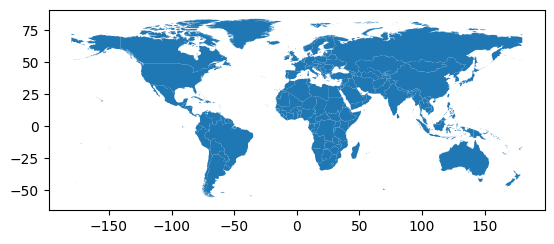

In [ ]:
wd_map.plot() #World Map Based on Boundaries

In [ ]:
len(wd_map)

256

In [ ]:
countries_to_keep = ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
                    'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
                    'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
                    'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
                    'Czech Republic', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
                    'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
                    'Grenada', 'Guatemala', 'Guinea', 'Guinea Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran',
                    'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyzstan',
                    'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali',
                    'Malta', 'Mauritania', 'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Netherlands',
                    'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'North Macedonia', 'Norway', 'Oman', 'Pakistan', 'Panama', 'Papua New Guinea', 'Paraguay',
                    'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Republic of Korea', 'Republic of Moldova', 'Romania', 'Russian Federation',
                    'Rwanda', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia',
                    'Seychelles', 'Sierra Leone', 'Singapore', 'Slovakia', 'Slovenia', 'Solomon Islands', 'South Africa', 'South Sudan', 'Spain', 'Sri Lanka',
                    'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Togo', 'Tonga',
                    'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
                    'United Republic of Tanzania', 'United States of America', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Viet Nam', 'Yemen', 'Zambia',
                    'Zimbabwe']
len(countries_to_keep)
wd_map = wd_map[wd_map['Country'].isin(countries_to_keep)]


179

# **Join/Merging**

**Data to be Merged**

To ascertain the readiness of governments, we will measure certain key indicators that influence AI adoption. To execute this, we got two datasets that we will match with the World Map.

Data_1 - AI Readiness Indicators: https://docs.google.com/uc?id=1DK5kz1eSB7IA24eGKro4gNH7DRyunCGo&export=download


**Data_1 Exploration and Processing**

In [ ]:
#Import the Data_1: AI Readiness Indicators

url = 'https://docs.google.com/uc?id=1DK5kz1eSB7IA24eGKro4gNH7DRyunCGo&export=download'
ai_readiness_indicators = pd.read_csv(url, encoding='latin-1')

In [ ]:
#Exploring the Data Types of the variables
ai_readiness_indicators.dtypes

Country                                                                    object
AI strategy                                                                 int64
Data protection and privacy laws                                            int64
Cybersecurity                                                             float64
Legal framework's adaptability to digital business models                 float64
Ethical principles                                                          int64
Accountability                                                            float64
Online services                                                           float64
Foundational IT infrastructure                                            float64
Government Promotion of Investment in Emerging Technologies               float64
Government Effectiveness                                                  float64
Government responsiveness to change                                       float64
Procurement Data

In [ ]:
#Let us remove the unnecesary variables, leaving only the necessary variables
ai_readiness_indicators = ai_readiness_indicators[['Country','Graduates in STEM or computer science','Foundational IT infrastructure','Adoption of Emerging Technologies','AI research papers (log transformation)','Government responsiveness to change','R&D Spending (log transformation)']]

In [ ]:
#Exploring the first 5 Rows
ai_readiness_indicators.head(5)

,Country,Graduates in STEM or computer science,Foundational IT infrastructure,Adoption of Emerging Technologies,AI research papers (log transformation),Government responsiveness to change
0,Afghanistan,11.25,41.46,NaN,19.68,NaN
1,Albania,18.54,70.68,19.18,18.12,42.81
2,Algeria,30.13,49.33,47.15,54.07,48.18
3,Andorra,7.45,19.58,72.16,0.00,48.79
4,Angola,12.01,43.58,16.41,0.00,31.42


In [ ]:
#Remove Empty Data
ai_readiness_indicators=ai_readiness_indicators.iloc[1:, :]
ai_readiness_indicators

,Country,Graduates in STEM or computer science,Foundational IT infrastructure,Adoption of Emerging Technologies,AI research papers (log transformation),Government responsiveness to change
1,Albania,18.54,70.68,19.18,18.12,42.81
2,Algeria,30.13,49.33,47.15,54.07,48.18
3,Andorra,7.45,19.58,72.16,0.00,48.79
4,Angola,12.01,43.58,16.41,0.00,31.42
5,Antigua and Barbuda,4.72,46.58,46.96,0.00,38.81
...,...,...,...,...,...,...
176,Venezuela,17.19,37.74,46.09,26.69,7.20
177,Viet Nam,22.68,80.40,50.09,61.18,49.40
178,Yemen,22.96,34.98,NaN,32.95,21.89
179,Zambia,18.64,65.31,25.44,11.11,39.47


In [ ]:
countries_to_keep = ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
                    'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
                    'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
                    'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
                    'Czech Republic', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
                    'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
                    'Grenada', 'Guatemala', 'Guinea', 'Guinea Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran',
                    'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyzstan',
                    'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali',
                    'Malta', 'Mauritania', 'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Netherlands',
                    'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'North Macedonia', 'Norway', 'Oman', 'Pakistan', 'Panama', 'Papua New Guinea', 'Paraguay',
                    'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Republic of Korea', 'Republic of Moldova', 'Romania', 'Russian Federation',
                    'Rwanda', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia',
                    'Seychelles', 'Sierra Leone', 'Singapore', 'Slovakia', 'Slovenia', 'Solomon Islands', 'South Africa', 'South Sudan', 'Spain', 'Sri Lanka',
                    'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Togo', 'Tonga',
                    'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
                    'United Republic of Tanzania', 'United States of America', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Viet Nam', 'Yemen', 'Zambia',
                    'Zimbabwe']

ai_readiness_indicators = ai_readiness_indicators[ai_readiness_indicators['Country'].isin(countries_to_keep)]


**1. Foundational IT infrastructure**

We want to map Foundational IT infrastructure across countries. How much infrastructure does the country have to support technological advancements.

First need to get the map with countries (wd_map), then the Data_1 on the AI Readiness Indicator and merge with countries data and finaly color code the polygons.




Merge Foundational IT infrastructure

In [ ]:
# Merge using outer join
wd_map1 = pd.merge(wd_map, ai_readiness_indicators, on='Country', how='outer', indicator=True)

# Display specific columns (make sure to assign this to a variable or print it)
result = wd_map1[['Country', 'Foundational IT infrastructure']]
print(result)

# Merge using inner join to keep exact matches
wd_map3 = pd.merge(wd_map, ai_readiness_indicators, on='Country', how='inner', indicator=False)


                 Country  Foundational IT infrastructure
0                 Uganda                           88.88
1             Uzbekistan                           79.38
2                Ireland                           46.69
3                Eritrea                            5.76
4               Mongolia                           93.36
..                   ...                             ...
174                Libya                           15.61
175      North Macedonia                           58.31
176  Republic of Moldova                           74.24
177       United Kingdom                           67.50
178             Viet Nam                           80.40

[179 rows x 2 columns]


In [ ]:
import matplotlib.pyplot as plt


<Axes: >

[]

[]

<Axes: >

[]

[]

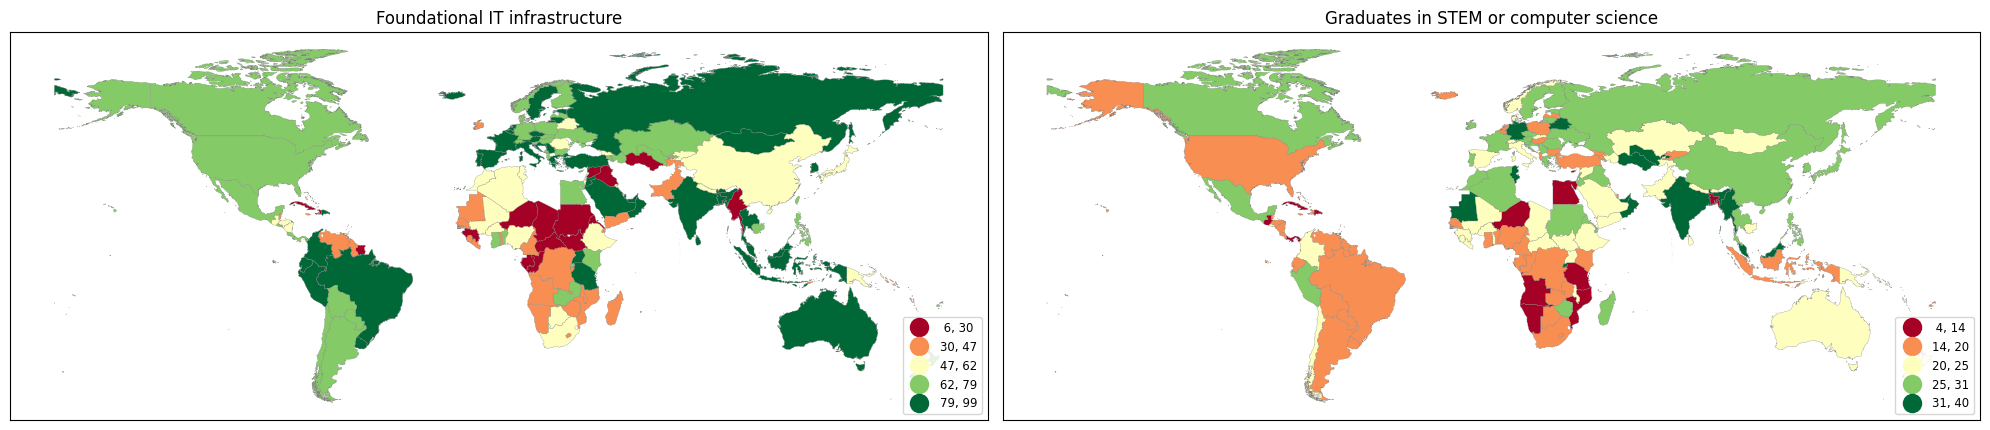

In [ ]:


fig, axs = plt.subplots(1,2, figsize=(20,30),sharey=True, tight_layout=True)
wd_map3.plot(ax=axs[0],column='Foundational IT infrastructure',legend=True,cmap='RdYlGn',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[0].title.set_text("Foundational IT infrastructure")
axs[0].set_xticks([]); axs[0].set_yticks([])

wd_map3.plot(ax=axs[1],column='Graduates in STEM or computer science',legend=True,cmap='RdYlGn',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.2,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
axs[1].title.set_text("Graduates in STEM or computer science")
axs[1].set_xticks([]); axs[1].set_yticks([])

**Observation**

1. Countries in Africa have poor IT infrastructure which also reflects in their low government AI readiness.

2. Although countries like Brazil, Tanzania have good IT infrastructure, it doesn't totally translate to the government's AI readiness.

**2. Graduates in STEM or computer science**

We want to map Graduates in STEM or computer science across countries. Which is the percentage of people that graduate from STEM as compared to other programs.

First need to get the map with countries (wd_map), then the Data_1 on the AI Readiness Indicator and merge with countries data and finaly color code the polygons.




**Observations**

1. Most African countries have low percentage of STEM graduates.

2. Although countries like Brazil and the US have low number of STEM graduates compared to other programs, they still have a comparably high AI readiness index.

**3. AI research papers**

We want to map percentage of AI research papers across countries.

First need to get the map with countries (wd_map), then the Data_1 on the AI Readiness Indicator and merge with countries data and finaly color code the polygons.




Merge AI research papers

In [ ]:
# Merge using outer join
wd_map1 = pd.merge(wd_map, ai_readiness_indicators, on='Country', how='outer', indicator=True)

# Display specific columns (make sure to assign this to a variable or print it)
result = wd_map1[['Country', 'AI research papers (log transformation)']]
print(result)

# Merge using inner join to keep exact matches
wd_map5 = pd.merge(wd_map, ai_readiness_indicators, on='Country', how='inner', indicator=False)


                      Country  AI research papers (log transformation)
0    Northern Mariana Islands                                      NaN
1               Kuril Islands                                      NaN
2                      France                                    72.38
3                      Serbia                                    45.28
4                     Uruguay                                    14.02
..                        ...                                      ...
262                     Libya                                    42.52
263           North Macedonia                                    23.28
264       Republic of Moldova                                    16.27
265            United Kingdom                                    80.09
266                  Viet Nam                                    61.18

[267 rows x 2 columns]


<Axes: >

[]

[]

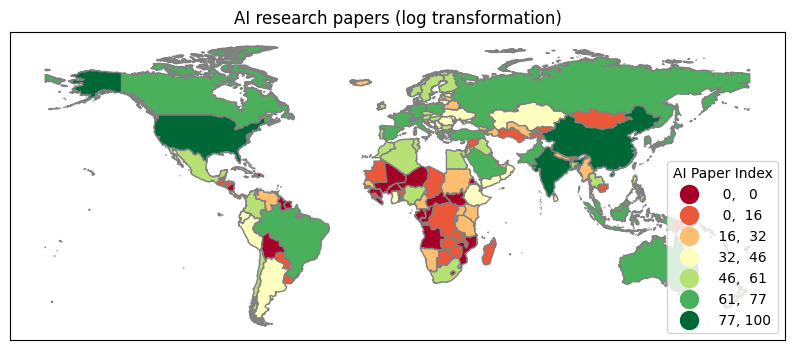

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,20))
wd_map5.plot(ax=ax,column='AI research papers (log transformation)',legend=True,cmap='RdYlGn',
          scheme='natural_breaks',k=7, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''AI Paper Index''')
ax.title.set_text("AI research papers (log transformation)")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#ax.set_xlabel('''source/definition: zillow.com/research/data''')
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

**Observation**

1. Overall, regions with low AI readiness index have lower percentage of research papers in AI.

2. Although African countries like Nigeria, Algeria and South Africa have a considerable percentage of AI research papers, they still have a low AI readiness index.

**4. R & D Spending**

We want to map how countries spend in research and development for technology initiatives.

First need to get the map with countries (wd_map), then the Data_1 on the AI Readiness Indicator and merge with countries data and finaly color code the polygons.




Merge AI research papers

In [ ]:
# Merge using outer join
wd_map1 = pd.merge(wd_map, ai_readiness_indicators, on='Country', how='outer', indicator=True)

# Display specific columns (make sure to assign this to a variable or print it)
result = wd_map1[['Country', 'R&D Spending (log transformation)']]
print(result)

# Merge using inner join to keep exact matches
wd_map5 = pd.merge(wd_map, ai_readiness_indicators, on='Country', how='inner', indicator=False)


                 Country  R&D Spending (log transformation)
0                 Uganda                               7.16
1             Uzbekistan                               7.00
2                Ireland                              43.13
3                Eritrea                              12.56
4               Mongolia                               6.71
..                   ...                                ...
176                Libya                              16.90
177      North Macedonia                              17.13
178  Republic of Moldova                              11.01
179       United Kingdom                              53.51
180             Viet Nam                              22.90

[181 rows x 2 columns]


<Axes: >

[]

[]

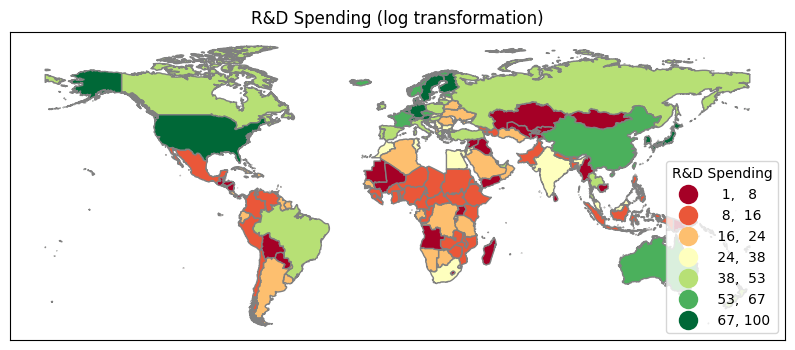

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,20))
wd_map5.plot(ax=ax,column='R&D Spending (log transformation)',legend=True,cmap='RdYlGn',
          scheme='natural_breaks',k=7, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''R&D Spending''')
ax.title.set_text("R&D Spending (log transformation)")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#ax.set_xlabel('''source/definition: zillow.com/research/data''')
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

**5. Government Responsivesness to Change**

We want to map Governments Responsivesness to Change across countries. How ready is a government willing to accept a change in policy, technology etc.

First need to get the map with countries (wd_map), then the Data_1 on AI Readiness Indicators and merge with countries data and finaly color code the polygons.


Merge Government's Responsiveness to Change

In [ ]:
# Merge using outer join
wd_map1 = pd.merge(wd_map, ai_readiness_indicators, on='Country', how='outer', indicator=True)

# Display specific columns (make sure to assign this to a variable or print it)
result = wd_map1[['Country', 'Government responsiveness to change']]
print(result)

# Merge using inner join to keep exact matches
wd_map6 = pd.merge(wd_map, ai_readiness_indicators, on='Country', how='inner', indicator=False)


                      Country  Government responsiveness to change
0    Northern Mariana Islands                                  NaN
1               Kuril Islands                                  NaN
2                      France                                55.99
3                      Serbia                                44.30
4                     Uruguay                                32.09
..                        ...                                  ...
262                     Libya                                42.70
263           North Macedonia                                31.84
264       Republic of Moldova                                35.21
265            United Kingdom                                58.37
266                  Viet Nam                                49.40

[267 rows x 2 columns]


<Axes: >

[]

[]

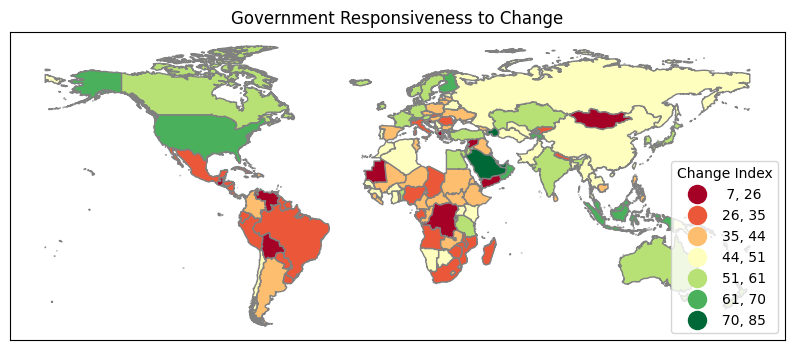

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,20))
wd_map6.plot(ax=ax,column='Government responsiveness to change',legend=True,cmap='RdYlGn',
          scheme='natural_breaks',k=7, edgecolor='grey',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''Change Index''')
ax.title.set_text("Government Responsiveness to Change")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#ax.set_xlabel('''source/definition: zillow.com/research/data''')
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as

**Observation**

1. Most countries where the government has low responsiveness to change also have a low AI readiness index.

2. Although countries like China, Russia, Brazil have a good AI readiness index, overall, they are not responsive to change. Which speaks to their responsiveness to AI adoption, but not overally policy or political change.

PERCENTAGE OF POVERTY BY COUNTRY

In [44]:
poverty_rate = pd.read_html('https://en.wikipedia.org/wiki/List_of_sovereign_states_by_percentage_of_population_living_in_poverty',match="Country")[0].head(5) #for match use header of col; ideally unique; case may matter
poverty_rate

,Country,$1.15,$2.60,$3.85,Year,Continent
0,Albania,13.35,26.60%,38.40%,2023,Europe
1,Algeria,0.32%,2.23%,20.83%,2019,Africa
2,Angola,51.40%,72.79%,89.13%,2019,Africa
3,Argentina,1.60%,5.80%,18.20%,2020,South America
4,Armenia,0.40%,6.90%,44.70%,2020,Asia


In [46]:
poverty_rate = poverty_rate[poverty_rate['Country'].isin(countries_to_keep)]

In [47]:
# Merge using outer join
wd_map1 = pd.merge(wd_map, poverty_rate, on='Country', how='outer', indicator=True)

# Display specific columns (make sure to assign this to a variable or print it)
result = wd_map1[['Country', '$2.60']]
print(result)

# Merge using inner join to keep exact matches
wd_map7 = pd.merge(wd_map, poverty_rate, on='Country', how='inner', indicator=False)

                 Country   $2.60
0                 Uganda     NaN
1             Uzbekistan     NaN
2                Ireland     NaN
3                Eritrea     NaN
4               Mongolia     NaN
..                   ...     ...
163  Trinidad and Tobago     NaN
164             Slovakia     NaN
165                 Mali     NaN
166              Armenia   6.90%
167              Albania  26.60%

[168 rows x 2 columns]


SCATTERPLOT FOR VARIABLES

In [ ]:
import plotly.express as px #a quick simple one
import plotly.graph_objects as go #can get convoluted
import numpy as np

In [ ]:
px.scatter(ai_readiness_indicators, x='Graduates in STEM or computer science', y='Foundational IT infrastructure', color='Adoption of Emerging Technologies',
                  hover_data=['Country'],width=1000,height=600)

In [ ]:
df = px.data.gapminder().query("year == 2007")
px.treemap(df, path=[px.Constant("world"), 'continent', 'country'], values='pop',
                  color='lifeExp', hover_data=['iso_alpha'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df['lifeExp'], weights=df['pop']))

**HEAT MAP**

In [ ]:
import seaborn as sns

<ipython-input-50-81171000fc5a>:1: FutureWarning: The default value of numeric_only in GeoDataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(wd_map1.corr().round(2),cmap="BrBG",annot=True) # RdYlGn love the colors!


<Axes: >

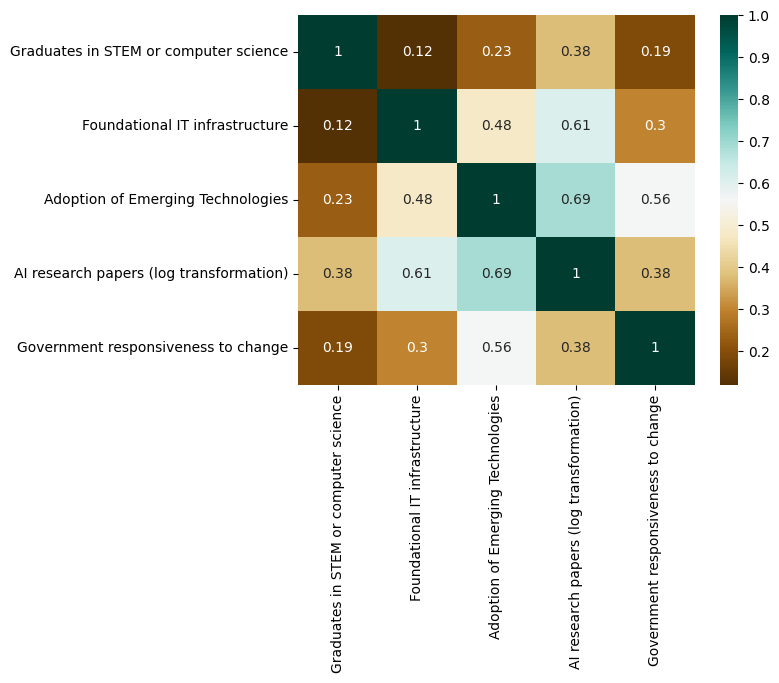

In [ ]:
sns.heatmap(wd_map1.corr().round(2),cmap="BrBG",annot=True) # RdYlGn love the colors!

**Recommendations**

These recommendations are country and region specific which will be reflected in our implementation of our project initiative.

Governments should consider the following:

1. Adopt policies that push for accurate data collection.
2. Adopt AI into some public sector services (in phases)
3. Increase educational funding for STEM programs.
4. Launch initiatives to educate the general populace about the need for AI adoption.
5. Incentivize students going into STEM (scholarships, increased job certainty for STEM profesionals)
6. Invest massively in IT Infrastructures.
7. Fund AI research.
